# 1. Loading dataset

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/un-general-debates-blueprint.csv')

In [ ]:
df.sample(3)

,session,year,country,country_name,speaker,position,text
3130,47,1992,KAZ,Kazakhstan,Nazarbaev,President,"First, I should \nlike to express our profound..."
5189,58,2003,UKR,Ukraine,Leonid Kuchma,President,﻿I should like at the\noutset to congratulate ...
4310,54,1999,CMR,Cameroon,Augustin Kontchou Kouomegni,Minister for Foreign Affairs,We are pleased to note that the annual session...


# 2. DataFrame summary statistics

In [ ]:
df['length'] = df['text'].str.len()

In [ ]:
df.columns

Index(['session', 'year', 'country', 'country_name', 'speaker', 'position',
       'text', 'length'],
      dtype='object')

In [ ]:
df.dtypes

session          int64
year             int64
country         object
country_name    object
speaker         object
position        object
text            object
length           int64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7507 entries, 0 to 7506
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   session       7507 non-null   int64 
 1   year          7507 non-null   int64 
 2   country       7507 non-null   object
 3   country_name  7507 non-null   object
 4   speaker       7480 non-null   object
 5   position      4502 non-null   object
 6   text          7507 non-null   object
 7   length        7507 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 469.3+ KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
session,7507.0,49.610763,12.892155,25.0,39.0,51.0,61.0,70.0
year,7507.0,1994.610763,12.892155,1970.0,1984.0,1996.0,2006.0,2015.0
length,7507.0,17967.281604,7860.038463,2362.0,12077.0,16424.0,22479.5,72041.0


In [ ]:
df[['country','speaker']].describe(include='O').T

,count,unique,top,freq
country,7507,199,SYR,46
speaker,7480,5428,Seyoum Mesfin,12


# 3. Checking for missing data

## Checking

In [ ]:
df.isna().sum()

session            0
year               0
country            0
country_name       0
speaker           27
position        3005
text               0
length             0
dtype: int64

## Fixing

In [ ]:
df['speaker'].fillna('unknown',inplace=True)

In [ ]:
df.isna().sum()

session            0
year               0
country            0
country_name       0
speaker            0
position        3005
text               0
length             0
dtype: int64

## More problems

In [ ]:
df[df['speaker'].str.contains('Bush')]['speaker'].value_counts()

George W. Bush        4
Mr. George W. Bush    2
Bush                  1
Mr. George W Bush     1
George Bush           1
Name: speaker, dtype: int64

# 4. Plotting distributions

## Length distribution

In [ ]:
df['length'].plot(kind='box', vert=False, figsize=(8, 1))

In [ ]:
df['length'].plot(kind='hist', bins=30, figsize=(6, 4), edgecolor='k')

# 5. Distributions across categories

In [ ]:
import seaborn as sns

where = df['country'].isin(['USA','FRA','GBR','CHN','RUS'])
sns.catplot(data=df[where], x='country', y='length', kind='box')
sns.catplot(data=df[where], x='country', y='length', kind='violin')

# 6. Development over time

In [ ]:
df.groupby('year').size().plot(title='Number of Countries')

In [ ]:
df.groupby('year').agg({'length':'mean'})\
  .plot(title='Avg. Speech Length', ylim=(0,30000))

# 7. Simple Text Processing
1. Case folding
2. Tokenization
3. Stop word removal

## 7.1 Case Folding

In [ ]:
str.lower('Hello World!')

'hello world!'

## 7.2 Tokenization

In [ ]:
import regex as re

def tokenize(text):
    return re.findall(r'[\w-]*\p{L}[\w-]*', text)

In [ ]:
text = "Let's defeat SARS-Cov-2 together in 2021!"
tokens = tokenize(text)
print("|".join(tokens))

Let|s|defeat|SARS-Cov-2|together|in


## 7.3 Stopword Removal

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stopwords = set (nltk.corpus.stopwords.words('english'))
stopwords

In [ ]:
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]

In [ ]:
remove_stop(tokens)

['Let', 'defeat', 'SARS-Cov-2', 'together']

## 7.4 Processing a pipeline

In [ ]:
pipeline = [str.lower, tokenize, remove_stop]

def prepare(text, pipeline):
    tokens = text
    for transform in pipeline:
        tokens = transform(tokens)
    return tokens

In [ ]:
prepare(text, pipeline)

['let', 'defeat', 'sars-cov-2', 'together']

## 7.5 Applying pipeline

In [ ]:
df['tokens'] = df['text'].apply(prepare, pipeline=pipeline)
df.sample(3)

,session,year,country,country_name,speaker,position,text,length,tokens
2942,46,1991,GIN,Guinea,SANOUSSI,NaN,"﻿First of all, let me convey to the representa...",12120,"[first, let, convey, representatives, present,..."
3647,50,1995,JAM,Jamaica,Mr. Mullings,Deputy Prime Minister,On behalf of the Government\nand the people of...,19763,"[behalf, government, people, jamaica, congratu..."
784,31,1976,PER,Peru,Mr. Puente Radbill,NaN,"Mr. President, in addressing this central Unit...",20681,"[mr, president, addressing, central, united, n..."


## 7.6 Counting number of tokens (words)

In [ ]:
df['num_tokens'] = df['tokens'].map(len)

In [ ]:
df.head()

# 8. Word Frequency Analysis

In [ ]:
from collections import Counter

tokens = tokenize("She likes my cats and my cats like my sofa")

counter = Counter(tokens)
print(counter)

Counter({'my': 3, 'cats': 2, 'She': 1, 'likes': 1, 'and': 1, 'like': 1, 'sofa': 1})


In [ ]:
more_tokens = tokenize("She likes dogs and cats")
counter.update(more_tokens)
print(counter)

Counter({'my': 3, 'cats': 3, 'She': 2, 'likes': 2, 'and': 2, 'like': 1, 'sofa': 1, 'dogs': 1})


In [ ]:
%%time
import numpy as np
tokens = df['tokens'].explode().values
counter = Counter(tokens)
print(counter.most_common(5))


[('nations', 124508), ('united', 120763), ('international', 117223), ('world', 89421), ('countries', 85734)]
CPU times: user 2.67 s, sys: 15.9 ms, total: 2.68 s
Wall time: 2.67 s


In [ ]:
%%time
counter = Counter()

df['tokens'].map(counter.update)

print(counter.most_common(5))

[('nations', 124508), ('united', 120763), ('international', 117223), ('world', 89421), ('countries', 85734)]
CPU times: user 1.72 s, sys: 9.27 ms, total: 1.73 s
Wall time: 1.74 s


# 9. Word Counting, DataFrame version

In [ ]:
def count_words(df, column='tokens', preprocess=None, min_freq = 2):
    
    # process tokens and update counter
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(tokens)
    
    # create counter and run through all data
    counter = Counter()
    df[column].map(update)
    
    # transform counter into a DataFrame
    freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
    freq_df = freq_df.query('freq > @min_freq')
    freq_df.index.name = 'token'
    
    return freq_df.sort_values('freq', ascending=False)

In [ ]:
freq_df = count_words(df)
freq_df.head(6)

,freq
token,
nations,124508
united,120763
international,117223
world,89421
countries,85734
peace,72625


In [ ]:
# count words with 10 or more characters
count_words(df, column='text',
           preprocess=lambda text: re.findall(r"\w{10,}", text))

,freq
token,
international,106974
development,51334
Government,35528
Organization,33763
developing,25177
...,...
preexisting,3
correlations,3
empirically,3


# 10. Frequency plot

[Text(0, 0.5, 'Token'), Text(0.5, 0, 'Frequency'), Text(0.5, 1.0, 'Top Words')]

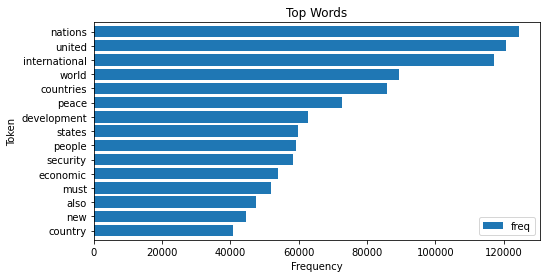

In [ ]:
ax = freq_df.head(15).plot(kind='barh', width=0.8, figsize=(8,4))
ax.invert_yaxis()
ax.set(xlabel='Frequency', ylabel='Token', title='Top Words')

# 11. Word Clouds

In [ ]:
!pip install wordcloud

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = df.query("year==2015 and country=='USA'")['text'].values[0]
text

'Seventy years after the founding of the United Nations it is worth reflecting on what the members of this body, working together, have helped to achieve. Out of the ashes of the Second World War, having witnessed the unthinkable power of the atomic age, the United States has worked with many nations in the Assembly to prevent a third world war — by forging alliances with old adversaries; by supporting the steady emergence of strong democracies accountable to their people and not to any foreign Power; and by building an international system that imposes a cost on those who choose conflict over cooperation, an order that recognizes the dignity and equal worth of all people.\nThat has been the work of seven decades. That is the ideal that this body has, at its best, pursued. Of course, there have been too many times when, collectively, we have fallen short of those ideals. Over the seven decades, terrible conflicts have claimed untold victims. But we have pressed forward, slowly, steadil

(-0.5, 399.5, 199.5, -0.5)

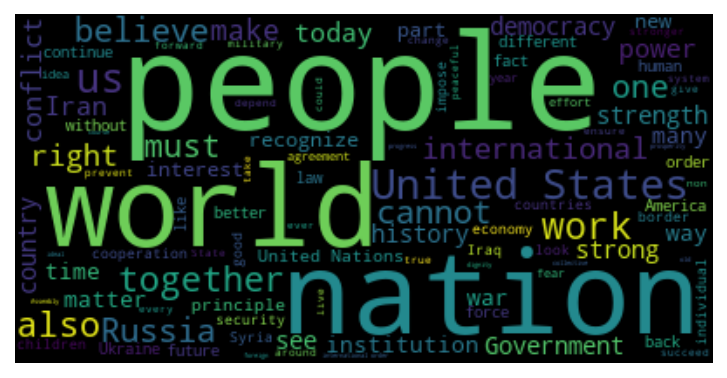

In [ ]:
wc = WordCloud(max_words=100, stopwords=stopwords)
wc.generate(text)
plt.figure(dpi=150)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')

## Word Cloud framework

In [ ]:
def wordcloud(word_freq, title=None, max_words=200, stopwords=None):

    wc = WordCloud(width=800, height=400, 
                   background_color= "black", colormap="Paired", 
                   max_font_size=150, max_words=max_words)
    
    # convert data frame into dict
    if type(word_freq) == pd.Series:
        counter = Counter(word_freq.fillna(0).to_dict())
    else:
        counter = word_freq

    # filter stop words in frequency counter
    if stopwords is not None:
        counter = {token:freq for (token, freq) in counter.items() 
                              if token not in stopwords}
    wc.generate_from_frequencies(counter)
 
    plt.title(title) 

    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")

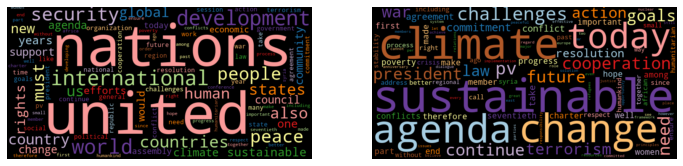

In [ ]:
freq_2015_df = count_words(df[df['year']==2015])
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)###
wordcloud(freq_2015_df['freq'], max_words=100)
plt.subplot(1,2,2)###
wordcloud(freq_2015_df['freq'], max_words=100, stopwords=freq_df.head(50).index)
#plt.tight_layout()###

# 12. Finding a Keyword-in-Context

In [ ]:
!pip install textacy

In [ ]:
from textacy.extract.kwic import keyword_in_context
import random

def kwic(doc_series, keyword, window=35, print_samples=5):
    
    def add_kwic(text):
        kwic_list.extend(keyword_in_context(text, keyword, ignore_case=True, window_width=window))
    
    kwic_list = []
    doc_series.map(add_kwic)
    
    if print_samples is None or print_samples==0:
        return kwic_list
    else:
        k = min(print_samples, len(kwic_list))
        print(f"{k} random samples out of {len(kwic_list)} " + \
              f"contexts for '{keyword}':")
        for sample in random.sample(list(kwic_list), k):
            print(re.sub(r'[\n\t]', ' ', sample[0]) + '  ' + \
                  sample[1]+'  ' +\
                  re.sub(r'[\n\t]',' ', sample[2]))

In [ ]:
kwic(df[df['year']==2015]['text'], 'sdgs', print_samples=5)

5 random samples out of 73 contexts for 'sdgs':
velop to effectively implement the   SDGs  . Togo, whose economy is largely de
the Sustainable Development Goals (  SDGs  ) and avoid issues such as those th
the islands have a warning for our   SDGs  . Without a healthy ocean it would 
notably through discussions on the   SDGs   and the 2030 Agenda for Sustainabl
transformative agenda. Many of the   SDGs   will not be attainable if we do no


# 13. N-gram

In [ ]:
def ngrams(tokens, n=2, sep=' '):
    return [sep.join(ngram) for ngram in zip(*[tokens[i:] for i in range(n)])]

In [ ]:
text = "the visible manifestation of the global climate change"
tokens = tokenize(text)
print("|".join(ngrams(tokens,2)))

the visible|visible manifestation|manifestation of|of the|the global|global climate|climate change


# 14. N-gram with stopword

In [ ]:
def ngrams(tokens, n=2, sep=' ', stopwords=set()):
    return [sep.join(ngram) for ngram in zip(*[tokens[i:] for i in range(n)])
           if len([t for t in ngram if t in stopwords])==0]

In [ ]:
text = "the visible manifestation of the global climate change"
tokens = tokenize(text)
print("|".join(ngrams(tokens,2, stopwords=stopwords)))

visible manifestation|global climate|climate change


# 15. Comparing frequencies across time intervals and categories

In [ ]:
def count_keywords(tokens, keywords):
    tokens = [t for t in tokens if t in keywords]
    counter = Counter(tokens)
    return [counter.get(k, 0) for k in keywords]

In [ ]:
keywords = ['nuclear','terrorism','climate','freedom']
tokens = ['nuclear','climate','climate','freedom','climate','freedom']

print(count_keywords(tokens, keywords))

In [ ]:
def count_keywords_by(df, by, keywords, column='tokens'):
    freq_matrix = df[column].apply(count_keywords, keywords=keywords)
    freq_df = pd.DataFrame.from_records(freq_matrix, columns=keywords)
    freq_df[by] = df[by]
    
    return freq_df.groupby(by).sum().sort_values(by)

In [ ]:
freq_df = count_keywords_by(df, by='year', keywords=keywords)

In [ ]:
freq_df

In [ ]:
freq_df.plot(kind='line', figsize=(16,8))

# *Lab*

## **1.word bigram**

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stopwords = set (nltk.corpus.stopwords.words('english'))
stopwords  #คำทั่วไปที่พบบ่อยในประโยคไม่ค่อยช่วยในการสื่อความหมายสักเท่าไร สามารถลบคำเหล่านั้นออกไปจากรายการคำศัพท์ได้เลย เช่น a, an, the

In [ ]:
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords] #สั่งลบstop word แล้วแปลงเป็นตัวพิมพ์เล็กทั้งหมด

In [ ]:
def ngrams(tokens, n=2, sep=' '): #คำสั่ง ngram โดยค่า n คือค่าที่เรากำหนดคำว่าจะให้แบ่งกี่คำในช่วงนั้น ในที่นี้คือ 2
    return [sep.join(ngram) for ngram in zip(*[tokens[i:] for i in range(n)])]

In [ ]:
pipeline = [str.lower, tokenize, remove_stop, ngrams] #ที่จริงใช้คำสั่งนี้ก็ได้แล้ว pipeline จะรันคำสั่งตามที่สั่งใน[]ที่ละขั้น

def prepare(text, pipeline):
    tokens = text
    for transform in pipeline:
        tokens = transform(tokens)
    return tokens

In [ ]:
df['bigram'] = df['text'].apply(prepare, pipeline=pipeline) #เอาdataframe มาสร้างอีก 1 คลอลัมน์ที่มีค่าเท่าเดิมแล้วมีตารางใหม่เข้าไปโดด apply จาก pipeline
#df.sample(10)


In [ ]:
df.head()

,session,year,country,country_name,speaker,position,text,length,tokens,num_tokens,bigram
0,25,1970,ALB,Albania,Mr. NAS,NaN,33: May I first convey to our President the co...,51419,"[may, first, convey, president, congratulation...",4092,"[may first, first convey, convey president, pr..."
1,25,1970,ARG,Argentina,Mr. DE PABLO PARDO,NaN,177.\t : It is a fortunate coincidence that pr...,29286,"[fortunate, coincidence, precisely, time, unit...",2341,"[fortunate coincidence, coincidence precisely,..."
2,25,1970,AUS,Australia,Mr. McMAHON,NaN,100.\t It is a pleasure for me to extend to y...,31839,"[pleasure, extend, mr, president, warmest, con...",2575,"[pleasure extend, extend mr, mr president, pre..."
3,25,1970,AUT,Austria,Mr. KIRCHSCHLAEGER,NaN,155.\t May I begin by expressing to Ambassado...,26616,"[may, begin, expressing, ambassador, hambro, b...",2166,"[may begin, begin expressing, expressing ambas..."
4,25,1970,BEL,Belgium,Mr. HARMEL,NaN,"176. No doubt each of us, before coming up to ...",25911,"[doubt, us, coming, rostrum, wonders, usefulne...",2064,"[doubt us, us coming, coming rostrum, rostrum ..."


In [ ]:
bigram01 = df.query("1970<=year<=1990")  #กำหนดปี 1970-1990 เพื่อดูbigram
bigram01

,session,year,country,country_name,speaker,position,text,length,tokens,num_tokens,bigram
0,25,1970,ALB,Albania,Mr. NAS,NaN,33: May I first convey to our President the co...,51419,"[may, first, convey, president, congratulation...",4092,"[may first, first convey, convey president, pr..."
1,25,1970,ARG,Argentina,Mr. DE PABLO PARDO,NaN,177.\t : It is a fortunate coincidence that pr...,29286,"[fortunate, coincidence, precisely, time, unit...",2341,"[fortunate coincidence, coincidence precisely,..."
2,25,1970,AUS,Australia,Mr. McMAHON,NaN,100.\t It is a pleasure for me to extend to y...,31839,"[pleasure, extend, mr, president, warmest, con...",2575,"[pleasure extend, extend mr, mr president, pre..."
3,25,1970,AUT,Austria,Mr. KIRCHSCHLAEGER,NaN,155.\t May I begin by expressing to Ambassado...,26616,"[may, begin, expressing, ambassador, hambro, b...",2166,"[may begin, begin expressing, expressing ambas..."
4,25,1970,BEL,Belgium,Mr. HARMEL,NaN,"176. No doubt each of us, before coming up to ...",25911,"[doubt, us, coming, rostrum, wonders, usefulne...",2064,"[doubt us, us coming, coming rostrum, rostrum ..."
...,...,...,...,...,...,...,...,...,...,...,...
2881,45,1990,WSM,Samoa,ALESAN,NaN,"﻿\nMr. President, it gives me great pleasure t...",16423,"[mr, president, gives, great, pleasure, see, g...",1375,"[mr president, president gives, gives great, g..."
2882,45,1990,YEM,Yemen,AL-DALI,NaN,﻿\nIt gives me great pleasure to extend to the...,15914,"[gives, great, pleasure, extend, president, wa...",1296,"[gives great, great pleasure, pleasure extend,..."
2883,45,1990,YUG,Yugoslavia,BORISLAV JOVIC,President,﻿It gives me distinct pleasure to see a repres...,17445,"[gives, distinct, pleasure, see, representativ...",1398,"[gives distinct, distinct pleasure, pleasure s..."
2884,45,1990,ZMB,Zambia,MWANANSHIKU,NaN,﻿I join the speakers who have preceded me in c...,18182,"[join, speakers, preceded, congratulating, sir...",1481,"[join speakers, speakers preceded, preceded co..."


In [ ]:
bigram02 = df.query("1990<year")
bigram02

,session,year,country,country_name,speaker,position,text,length,tokens,num_tokens,bigram
2886,46,1991,AFG,Afghanistan,FAZL-UL-HAQ KHALIQYAR,Prime Minister,﻿At the outset I wish to convey to Ambassador ...,27149,"[outset, wish, convey, ambassador, shihabi, wa...",2238,"[outset wish, wish convey, convey ambassador, ..."
2887,46,1991,AGO,Angola,VAN DUNEM,NaN,﻿Allow me first to congratulate Mr. Shihabi on...,17215,"[allow, first, congratulate, mr, shihabi, elec...",1413,"[allow first, first congratulate, congratulate..."
2888,46,1991,ALB,Albania,KAPLLANI,NaN,"﻿It gives me particular pleasure, on behalf of...",22231,"[gives, particular, pleasure, behalf, albanian...",1777,"[gives particular, particular pleasure, pleasu..."
2889,46,1991,ARE,United Arab Emirates,AL-NUAIMI,NaN,"﻿Mr. President, my country's delegation is pro...",17165,"[mr, president, country, delegation, proud, se...",1392,"[mr president, president country, country dele..."
2890,46,1991,ARG,Argentina,DI TELLA,NaN,"﻿At the outset, I would like to congratulate y...",17019,"[outset, would, like, congratulate, sir, elect...",1392,"[outset would, would like, like congratulate, ..."
...,...,...,...,...,...,...,...,...,...,...,...
7502,70,2015,YEM,Yemen,Mr. Abdrabuh Mansour Hadi Mansour,President,On behalf of the people and the Government of ...,10568,"[behalf, people, government, yemen, would, lik...",894,"[behalf people, people government, government ..."
7503,70,2015,YUG,Yugoslavia,Mr. Tomislav Nikolić,President,\nSeventy years have passed since the establis...,25430,"[seventy, years, passed, since, establishment,...",2118,"[seventy years, years passed, passed since, si..."
7504,70,2015,ZAF,South Africa,Jacob Zuma,President,I should like to congratulate the President an...,13662,"[like, congratulate, president, country, denma...",1160,"[like congratulate, congratulate president, pr..."
7505,70,2015,ZMB,Zambia,Mr. Edgar Chagwa Lungu,President,I would like to begin by thanking the Secretar...,14247,"[would, like, begin, thanking, secretary-gener...",1197,"[would like, like begin, begin thanking, thank..."


In [ ]:
# count words with 10 
countbi1 = count_words(bigram01, column='bigram')
countbi1.head(10)

,freq
token,
united nations,43846
general assembly,13915
developing countries,11991
international community,11506
south africa,9300
united states,7718
middle east,7608
security council,7500
peace security,6755


In [ ]:
countbi2 = count_words(bigram02, column='bigram')
countbi2.head(10)

,freq
token,
united nations,59398
international community,16280
security council,13472
human rights,13295
general assembly,13186
peace security,8466
developing countries,6527
member states,5941
sustainable development,5258


### สรุปข้อแรก การเปรียบเทียบ top10 คำของปี1970-1990 และ 1990-2015 ดังข้างต้น 

## **2. word cloud**

In [ ]:
def wordcloud(word_freq, title=None, max_words=200, stopwords=None):

    wc = WordCloud(width=800, height=400, 
                   background_color= "black", colormap="Paired", 
                   max_font_size=150, max_words=max_words)
    
    # convert data frame into dict
    if type(word_freq) == pd.Series:
        counter = Counter(word_freq.fillna(0).to_dict())
    else:
        counter = word_freq

    # filter stop words in frequency counter
    if stopwords is not None:
        counter = {token:freq for (token, freq) in counter.items() 
                              if token not in stopwords}
    wc.generate_from_frequencies(counter)
 
    plt.title(title) 

    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")

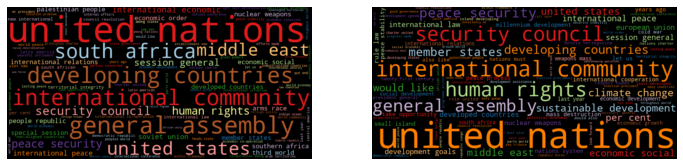

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)###
wordcloud(countbi1['freq'], max_words=100)
plt.subplot(1,2,2)###
wordcloud(countbi2['freq'], max_words=100)

In [ ]:
countbi1['freq']

token
united nations             43846
general assembly           13915
developing countries       11991
international community    11506
south africa                9300
                           ...  
contributed modest             3
nations sierra                 3
waldheim colleagues            3
world sierra                   3
previously security            3
Name: freq, Length: 314726, dtype: int64

In [ ]:
countbi2['freq']

token
united nations                 59398
international community        16280
security council               13472
human rights                   13295
general assembly               13186
                               ...  
transformation institutions        3
country worst                      3
work day                           3
incontrovertible truth             3
freedom seas                       3
Name: freq, Length: 309690, dtype: int64

### สรุปข้อสอง จากwordcloud ข้างต้นแสดงการเปรียบเทียบ word ระหว่าง 1970-1990 และ 1990-2015

## **3.create graph bigram 3 word**

In [ ]:
keywords = ['climate change','global warming','wars','sustainable development','peace security','developing countries']  #กำหนดคีย์เวิร์ดคำใหม่

In [ ]:
def count_keywords_by(df, by, keywords, column='bigram'):  #ทำการกรุ๊ป dataframe, byค่าที่เราเอามาเป็นตัวเชื่อมกรุ๊ป, keywords, columnที่เราจะเอามากรุ๊ป
    freq_matrix = df[column].apply(count_keywords, keywords=keywords)
    freq_df = pd.DataFrame.from_records(freq_matrix, columns=keywords)
    freq_df[by] = df[by]
    
    return freq_df.groupby(by).sum().sort_values(by)

In [ ]:
freq_df = count_keywords_by(df, by='year', keywords=keywords) #กรุ๊ปดูความถี่ของปีกับคำที่ใช้

In [ ]:
freq_df

,climate change,global warming,wars,sustainable development,peace security,developing countries
year,,,,,,
1970,0,0,0,0,169,237
1971,0,0,0,0,248,401
1972,0,0,0,0,271,429
1973,0,0,0,0,264,424
1974,0,0,0,0,241,587
1975,0,0,0,0,298,450
1976,0,0,0,0,363,737
1977,0,0,0,0,311,746
1978,0,0,0,0,334,806


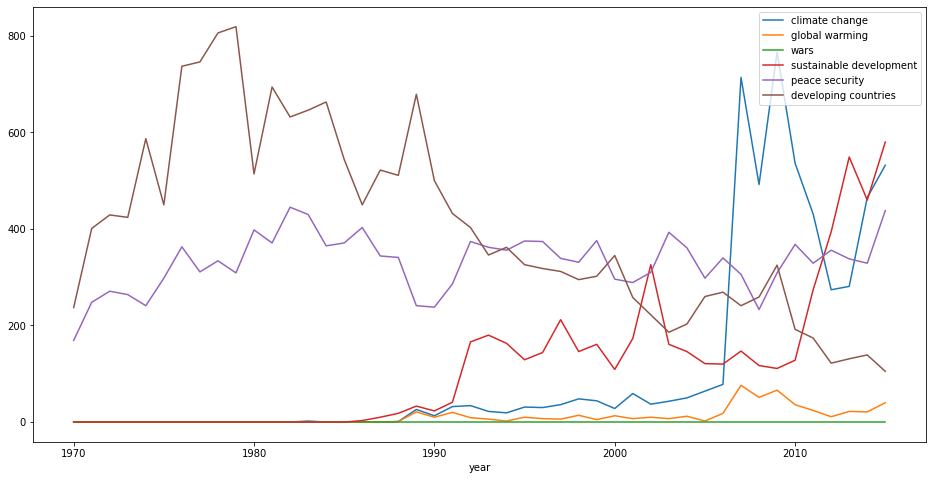

In [ ]:
freq_df.plot(kind='line', figsize=(16,8))